In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [61]:
df = pd.read_csv("California_Houses.csv")

In [62]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [63]:
df.tail()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166
20639,89400.0,2.3886,16,2785,616,1387,530,39.37,-121.24,146866.196892,648723.337126,825569.179028,233282.769063,205473.376575


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [65]:
df.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [66]:
df.shape

(20640, 14)

#### Plot outliers

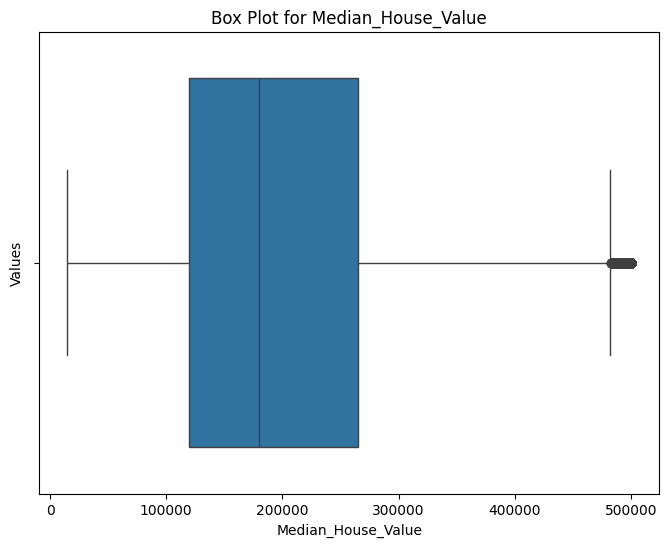

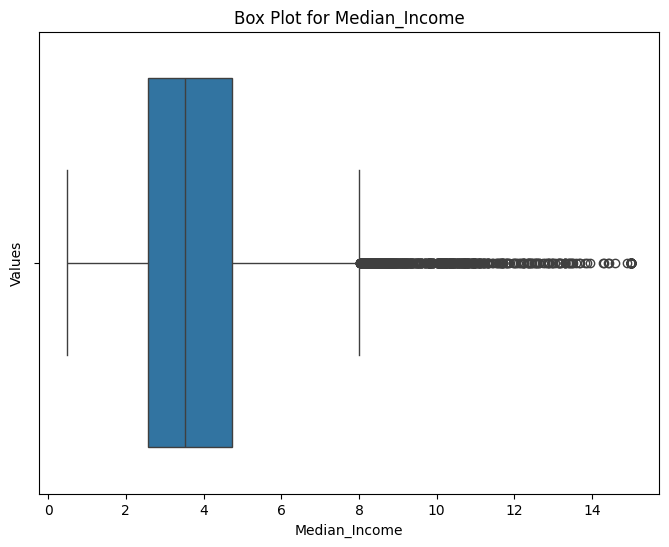

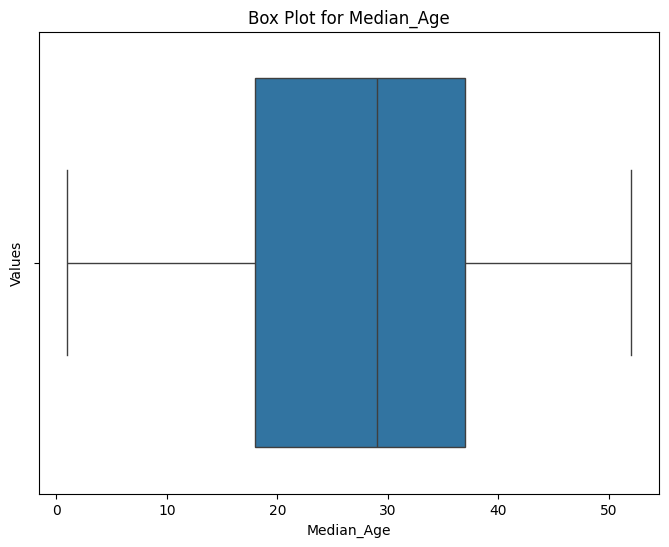

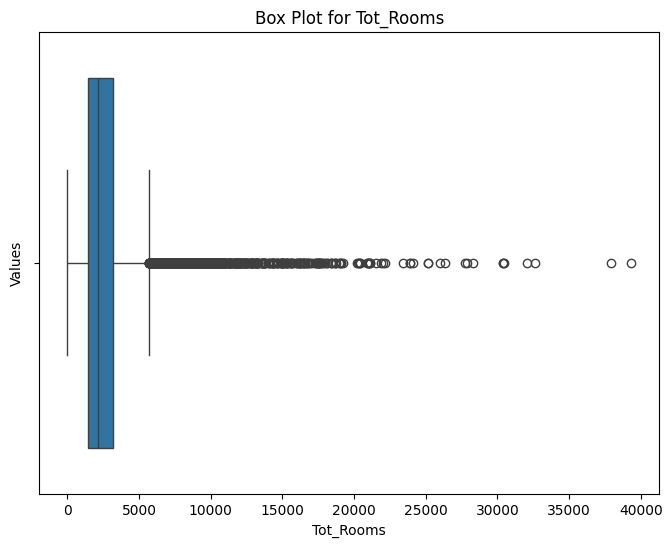

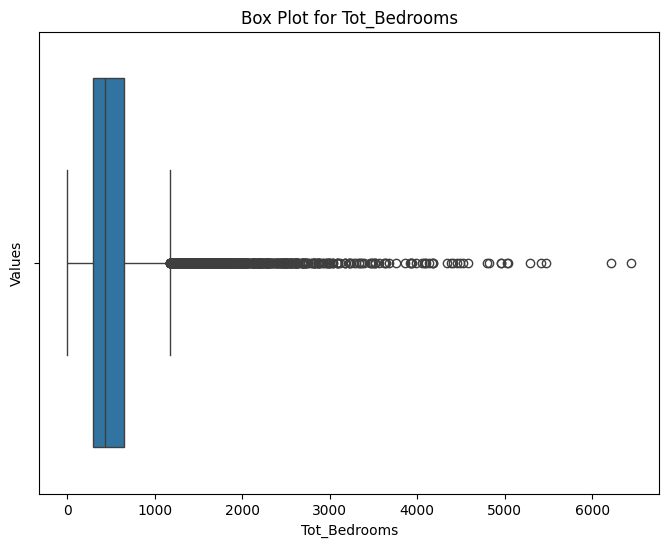

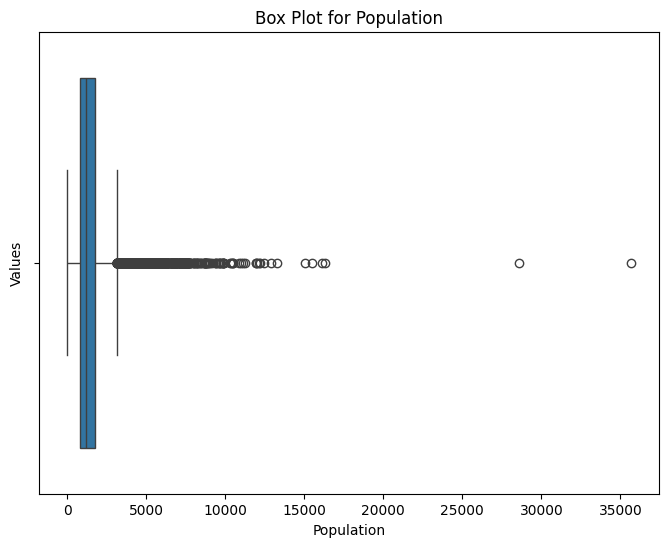

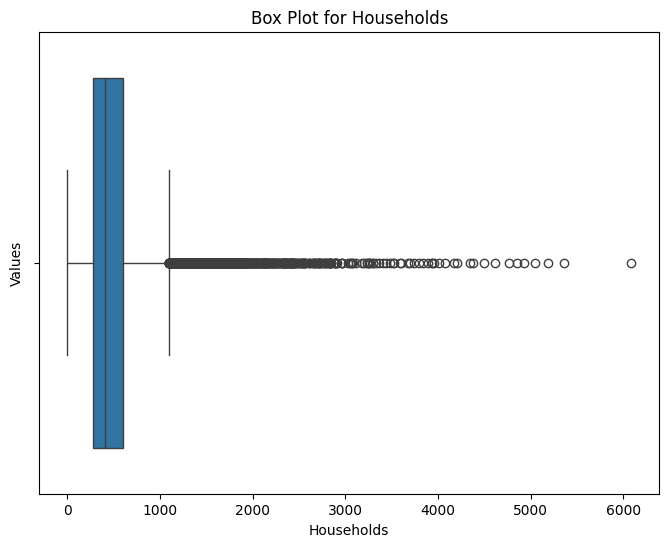

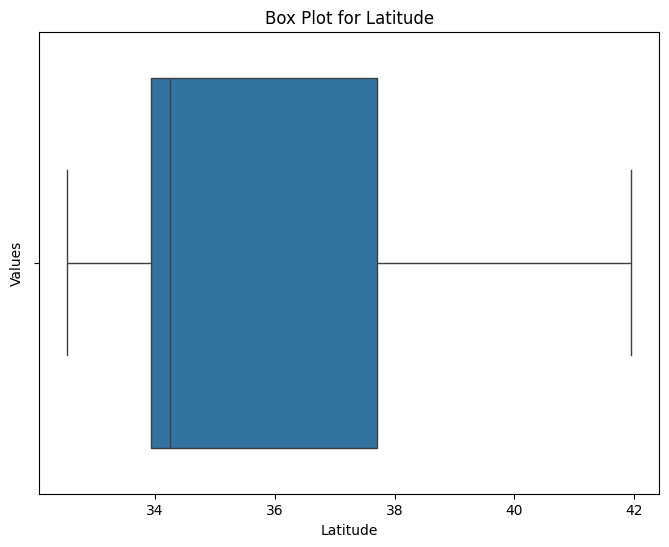

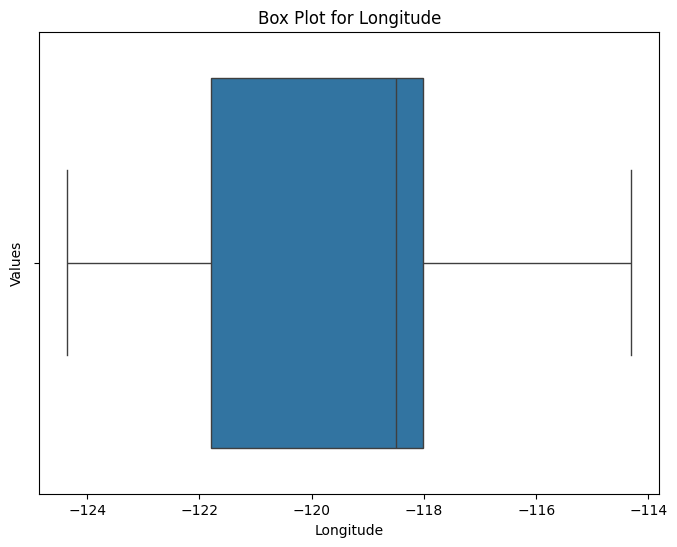

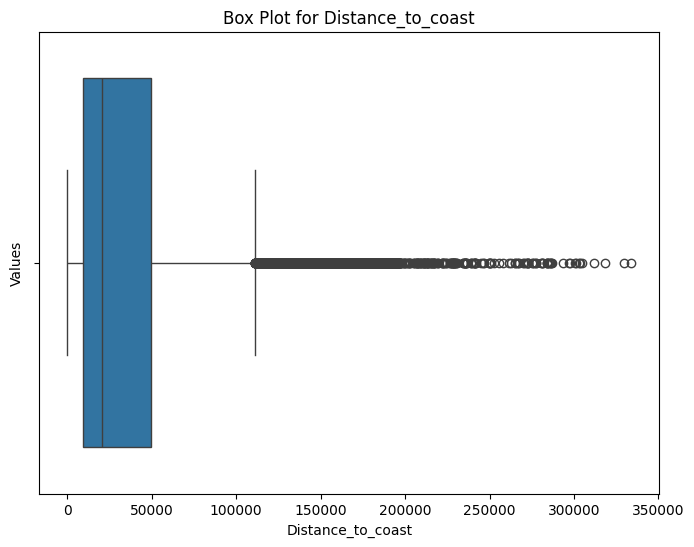

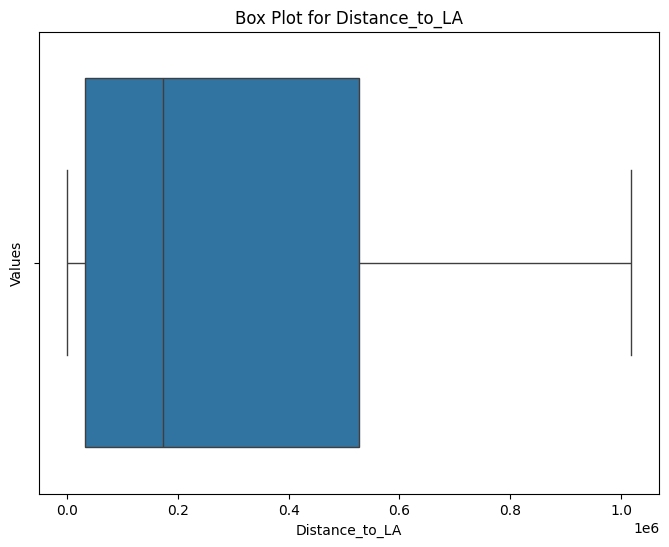

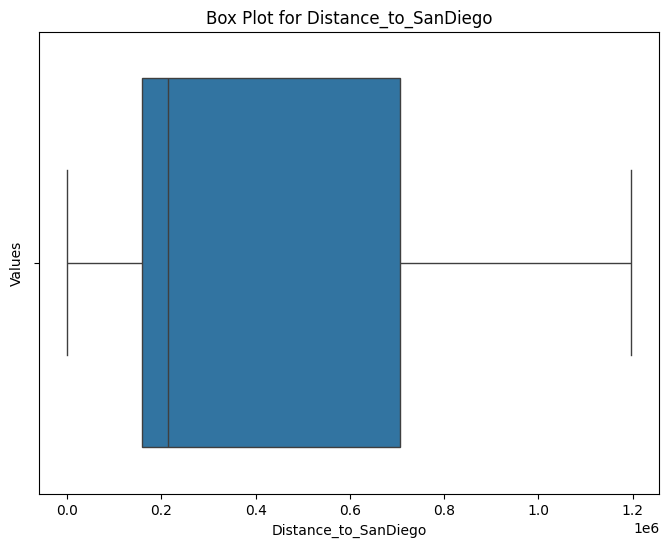

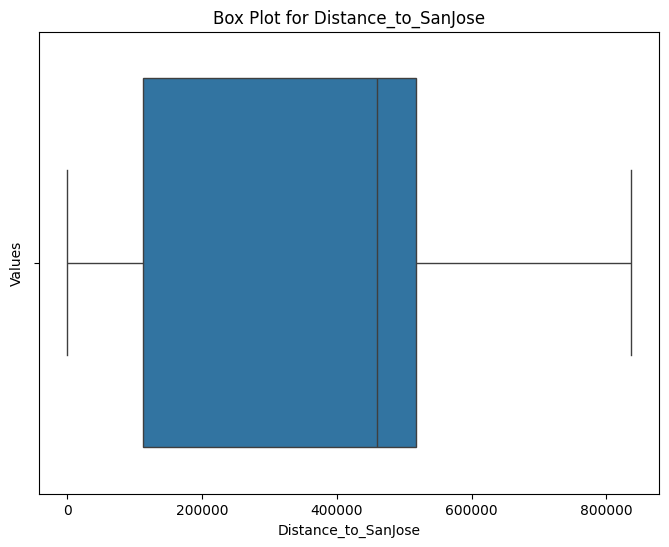

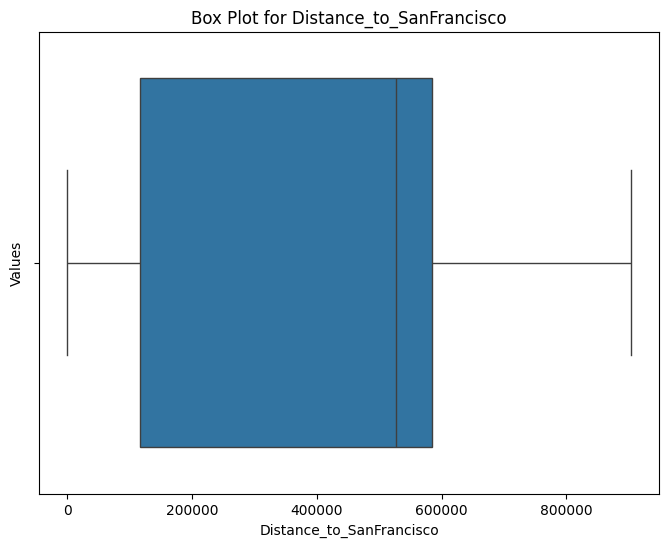

In [67]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


#### Remove Outliers

In [68]:
df = df[df['Median_House_Value'] <= 490000]
print(df.shape)
df = df[df['Median_Income'] <= 8]
print(df.shape)
df = df[df['Tot_Rooms'] <= 5000]
print(df.shape)
df = df[df['Tot_Bedrooms'] <= 5000]
print(df.shape)
df = df[df['Population'] <= 5000]
print(df.shape)
df = df[df['Households'] <= 1000]
print(df.shape)
df = df[df['Distance_to_coast'] <= 125000]
print(df.shape)

(19609, 14)
(19366, 14)
(17757, 14)
(17757, 14)
(17737, 14)
(17464, 14)
(15751, 14)


In [69]:
y = df["Median_House_Value"]
x = df.drop(columns=['Median_House_Value'])

scaler = StandardScaler()
x = scaler.fit_transform(x)
print(np.mean(y))

197031.6231985271


In [70]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.3, random_state=123)

x_validation, x_test, y_validation, y_test = train_test_split(x_, y_, test_size=0.5, random_state=123)

del(x_,y_)

print("Training feature set size:",x_train.shape)
print("Validation feature set size:",x_validation.shape)
print("Test feature set size:",x_test.shape)
print("Training variable set size:",y_train.shape)
print("Validation variable set size:",y_validation.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (11025, 13)
Validation feature set size: (2363, 13)
Test feature set size: (2363, 13)
Training variable set size: (11025,)
Validation variable set size: (2363,)
Test variable set size: (2363,)


#### Different value for Lambda

In [ ]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [84]:
models = {
    'Lasso Regression': [Lasso(),lasso_params],
    'Ridge Regression': [Ridge(),ridge_params]
}

In [82]:
results = {}
y_val_pred = {}
best_parms = {}

## Linear Regression

In [93]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred_val = model.predict(x_validation)
mse = mean_squared_error(y_validation, y_pred_val)
mae = mean_absolute_error(y_validation, y_pred_val)
results['Linear Regression'] = {'MSE': mse, 'MAE': mae}
y_val_pred['Linear Regression'] = y_pred_val

print(mse)
print(mae)

3587866775.9929395
43781.19841556169


## Lasso Regression
## Ridge Regression

In [88]:
for name, model in models.items():
    grid = GridSearchCV(model[0], model[1], cv=5, scoring='neg_mean_squared_error')
    grid.fit(x_train, y_train)
    best_parms[name] = grid.best_params_['alpha']

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.509e+13, tolerance: 7.492e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e+13, tolerance: 7.572e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packag

In [96]:
best_lasso = Lasso(alpha=best_parms["Lasso Regression"], max_iter=10000)
best_lasso.fit(x_train, y_train)

# Train Ridge with the best alpha
best_ridge = Ridge(alpha=best_parms['Ridge Regression'])
best_ridge.fit(x_train, y_train)

# Predict on validation set
y_pred_lasso = best_lasso.predict(x_validation)
y_pred_ridge = best_ridge.predict(x_validation)

# Calculate MSE and MAE for both models
mse_lasso = mean_squared_error(y_validation, y_pred_lasso)
mae_lasso = mean_absolute_error(y_validation, y_pred_lasso)

mse_ridge = mean_squared_error(y_validation, y_pred_ridge)
mae_ridge = mean_absolute_error(y_validation, y_pred_ridge)

results['Lasso Regression"'] = {'MSE': mse_lasso, 'MAE': mae_lasso}
y_val_pred['Lasso Regression"n'] = y_pred_lasso

results['Ridge Regression'] = {'MSE': mse_ridge, 'MAE': mae_ridge}
y_val_pred['Ridge Regression'] = y_pred_ridge


print(f"Lasso - MSE: {mse_lasso}, MAE: {mae_lasso}")
print(f"Ridge - MSE: {mse_ridge}, MAE: {mae_ridge}")

Lasso - MSE: 3587782158.6331534, MAE: 43781.78240395938
Ridge - MSE: 3587409575.2501154, MAE: 43784.83106369291


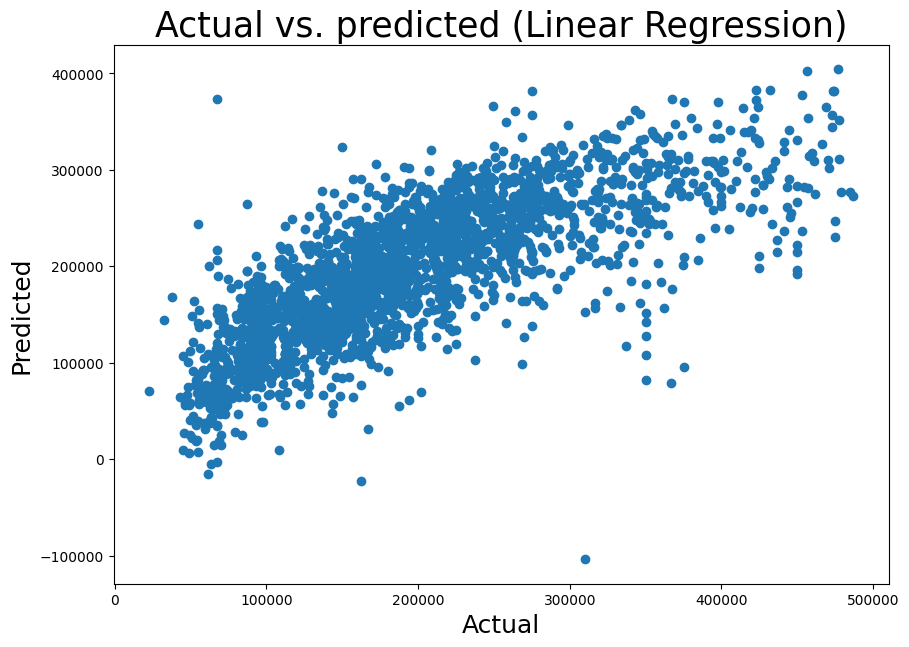

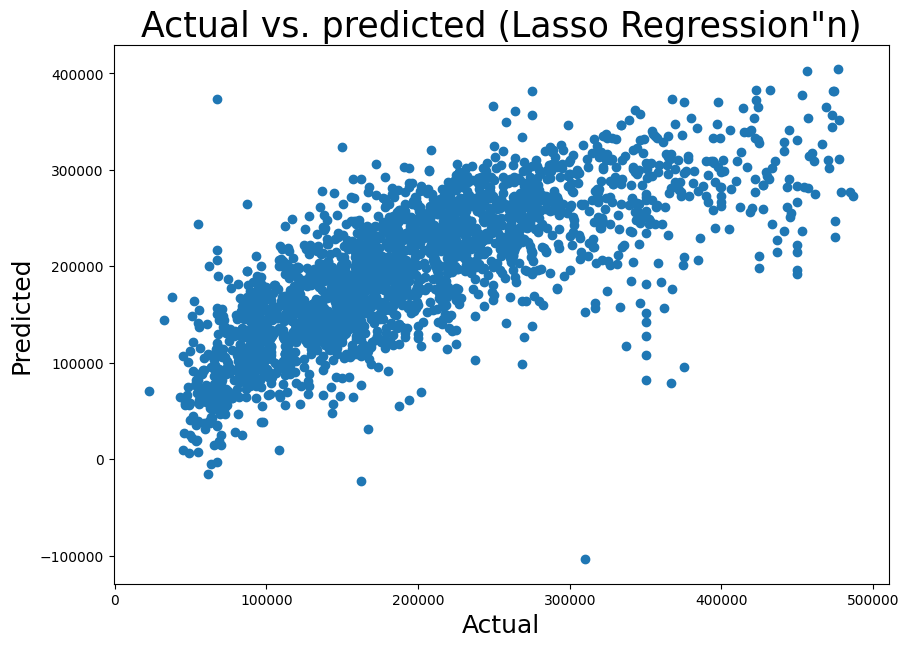

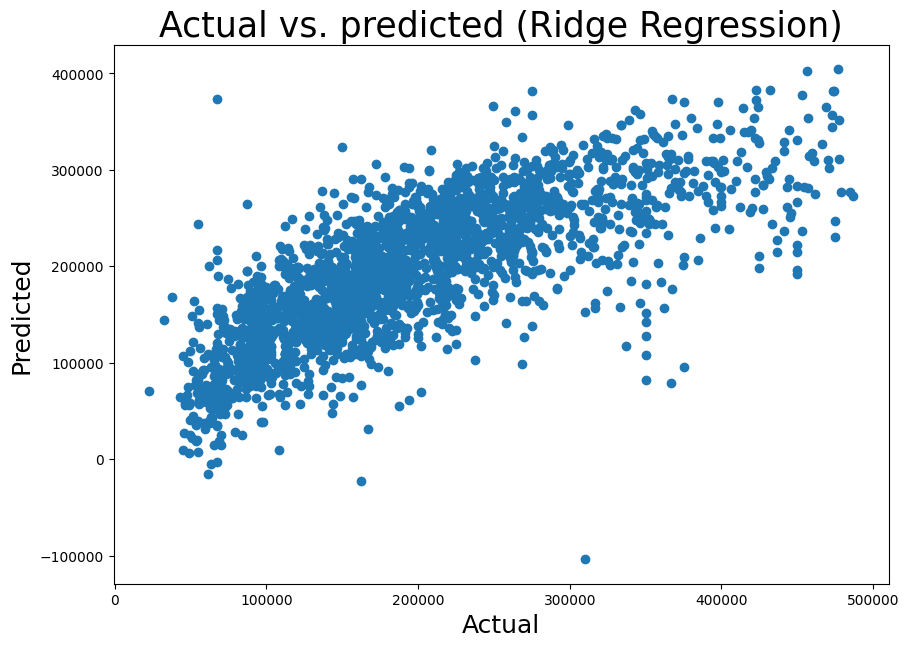

In [95]:
for name,prediction in y_val_pred.items():
    plt.figure(figsize=(10,7))
    plt.title(f"Actual vs. predicted ({name})",fontsize=25)
    plt.xlabel("Actual",fontsize=18)
    plt.ylabel("Predicted", fontsize=18)
    plt.scatter(x=y_validation,y=y_pred_val)

### Graphs should be 45 degree angle with same x and y coordinates